 - https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
 - https://github.com/alexvlis/extractive-document-summarization

In [1]:
from rouge import Rouge
import os
from nltk import tokenize

In [2]:
import gensim
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
import nltk

Using TensorFlow backend.


In [3]:
rouge = Rouge()

In [4]:
import pandas as pd
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")

# Train.py

In [5]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import *

from sklearn.utils import shuffle
import pickle
import numpy as np


In [6]:
print("loading pickle files...")
data1 = pickle.load(open("WordEmbeddingsToSaliency_duc1.pickle", "rb"))
data2 = pickle.load(open("WordEmbeddingsToSaliency_duc2.pickle", "rb"))
data3 = pickle.load(open("WordEmbeddingsToSaliency_duc3.pickle", "rb"))
data4 = pickle.load(open("WordEmbeddingsToSaliency_duc4.pickle", "rb"))
data5 = pickle.load(open("WordEmbeddingsToSaliency_duc5.pickle", "rb"))
data6 = pickle.load(open("WordEmbeddingsToSaliency_duc6.pickle", "rb"))
data7 = pickle.load(open("WordEmbeddingsToSaliency_duc7.pickle", "rb"))
data8 = pickle.load(open("WordEmbeddingsToSaliency_duc8.pickle", "rb"))

loading pickle files...


In [7]:
print("concatenating data...")
data = np.concatenate((data1, data2, data3, data4, data5, data6, data7, data8), axis=0)

concatenating data...


In [8]:
print("extracting x and y...")
x = data[::2]
y = data[1::2]

x1 = np.dstack(x)
x2 = np.rollaxis(x1, -1)
x3 = np.array(x2)
x4 =np.expand_dims(x3, 3)
x4.shape

extracting x and y...


(12828, 250, 300, 1)

In [122]:
# Model Hyperparameters
conv_window_size = (100, 100)
num_filters = 300
reg = 0.01
dropout = 0.5

# Training parameters
epochs = 10
batch_size = 256
test_train_ratio = 0.2
val_train_ratio = 0.2

x_train, y_train = x4,y
print("training data:", x_train.shape, y_train.shape)

training data: (12828, 250, 300, 1) (12828,)


In [123]:
y_train = y_train.reshape(len(y_train),1)

In [124]:
print("training data:", x_train.shape, y_train.shape)

training data: (12828, 250, 300, 1) (12828, 1)


### convolution network implimentation

In [125]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2],1),
                    filters=num_filters,
                    kernel_size=conv_window_size,
                    padding="valid",
                    activation="relu",
                    data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(num_filters, 1)))    
model.add(layers.Flatten())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(3, activation='tanh', kernel_regularizer=regularizers.l2(reg)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(reg)))

model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adadelta(),metrics=['mae'])


ValueError: Negative dimension size caused by subtracting 300 from 151 for 'max_pooling2d_18/MaxPool' (op: 'MaxPool') with input shapes: [?,151,201,300].

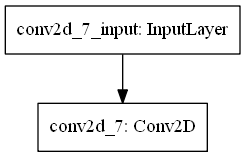

In [81]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model, to_file='model.png'
)


In [82]:
#y_train = y_train.reshape(len(y_train),1)
y_train = y_train.astype(str).astype(float)

In [83]:
type(x_train),x_train.shape,type(y_train),y_train.shape

(numpy.ndarray, (12828, 250, 300, 1), numpy.ndarray, (12828, 1))

In [84]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=val_train_ratio)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [74]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Plotting...


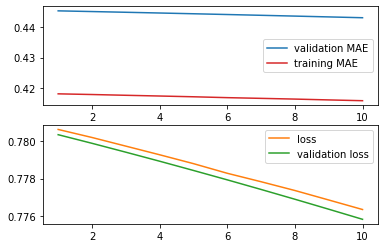

Done.


In [75]:

print("Plotting...")
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(1, epochs+1), history.history['val_mae'], 'tab:blue', label="validation MAE")
ax1.plot(range(1, epochs+1), history.history['mae'], 'tab:red', label="training MAE")

ax2.plot(range(1, epochs+1), history.history['loss'], 'tab:orange', label="loss")
ax2.plot(range(1, epochs+1), history.history['val_loss'], 'tab:green', label="validation loss")

ax1.legend()
ax2.legend()

f.savefig('training-softmax.png', dpi=300)
plt.show()
print("Done.")

In [76]:
print("Saving model...")
model.save('Model-Softmax-DUC_w10_f100.h5')

Saving model...
